### Assumptions of parametric tests
1. Normally distributed data
2. Homogeneity of variance
3. Interval data
4. Independence

### Checking normality graphically

In [65]:
import pandas as pd

data = pd.read_csv('./DownloadFestival(No Outlier).dat', delim_whitespace=True)
data.columns

Index(['ticknumb', 'gender', 'day1', 'day2', 'day3'], dtype='object')

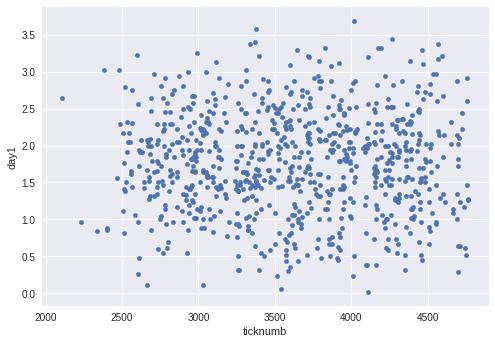

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for outliers
data.plot.scatter('ticknumb', 'day1')
plt.show()

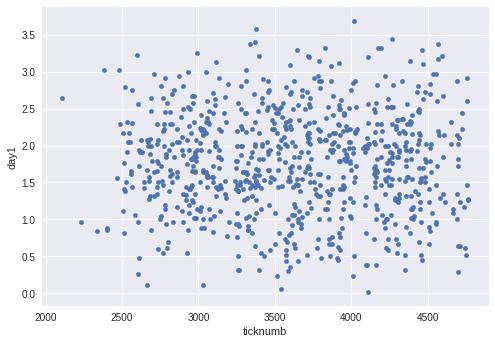

In [67]:
# Filter outliers
data = data.query('day1<5')
data.plot.scatter('ticknumb', 'day1')
plt.show()

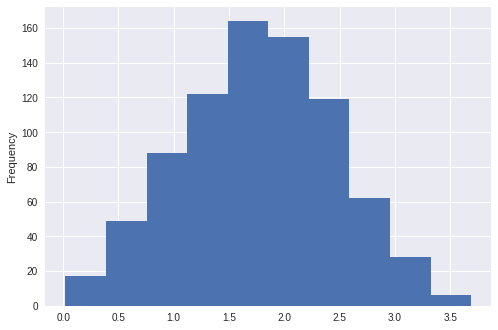

In [68]:
data['day1'].plot.hist()
plt.show()

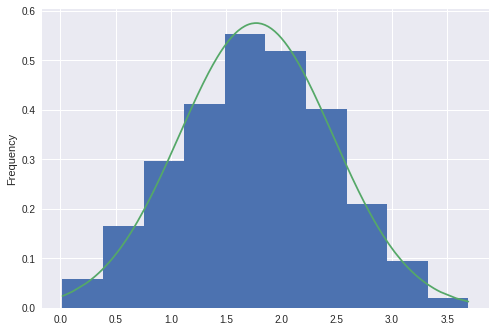

In [5]:
import numpy as np
import scipy.stats as stats
# Normal distribution
norm_x = sorted(data.day1)
norm_y = stats.norm.pdf(norm_x, data.day1.mean(), data.day1.std())

# Compare normal distribution to our data
data.day1.plot.hist(normed=True)
plt.plot(norm_x, norm_y)
plt.show()


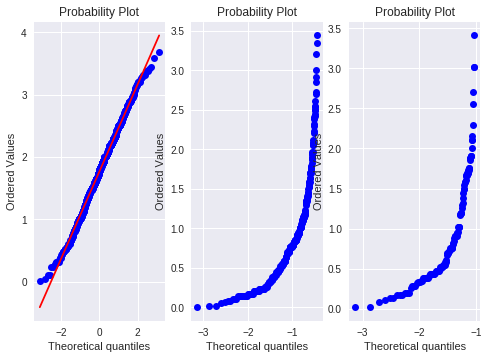

In [6]:
# Check with a Q-Q plot


ax1 = plt.subplot(131)
stats.probplot(data.day1, plot=plt)

ax2 = plt.subplot(132)
stats.probplot(data.day2, plot=plt)

ax3 = plt.subplot(133)
stats.probplot(data.day3, plot=plt)

plt.show()

### Checking normality numerically

In [74]:
stats.describe(data.day1, nan_policy='omit', bias=False)

DescribeResult(nobs=810, minmax=(0.02, 3.6899999999999999), mean=1.7711358024691357, variance=0.48099623617024523, skewness=-0.004444799001218579, kurtosis=-0.41034616131416524)

In [70]:
data.skew()

ticknumb   -0.048936
day1       -0.004445
day2        1.095226
day3        1.032868
dtype: float64

In [71]:
data.kurt()

ticknumb   -1.028240
day1       -0.410346
day2        0.822206
day3        0.731500
dtype: float64

In [55]:
stats.skewtest(data.day2.dropna())

SkewtestResult(statistic=6.2277957004457258, pvalue=4.7304335109343825e-10)

In [30]:
data.day3.isnull().sum()
# data.day3.size

686

## Come back to skew and kurtosis test

In [75]:
ex_data = pd.read_csv('./RExam.dat', delim_whitespace=True)
ex_data.describe()

,exam,computer,lectures,numeracy,uni
count,100.00000,100.000000,100.000000,100.000000,100.000000
mean,58.10000,50.710000,59.765000,4.850000,0.500000
std,21.31557,8.260035,21.684777,2.705681,0.502519
min,15.00000,27.000000,8.000000,1.000000,0.000000
25%,38.00000,45.750000,46.375000,3.000000,0.000000
50%,60.00000,51.500000,62.000000,4.000000,0.500000
75%,75.00000,56.000000,74.625000,7.000000,1.000000
max,99.00000,73.000000,100.000000,14.000000,1.000000


In [79]:
stats.describe(ex_data.exam, bias=False)

DescribeResult(nobs=100, minmax=(15, 99), mean=58.100000000000001, variance=454.35353535353534, skewness=-0.10699264223065533, kurtosis=-1.1051308835588278)

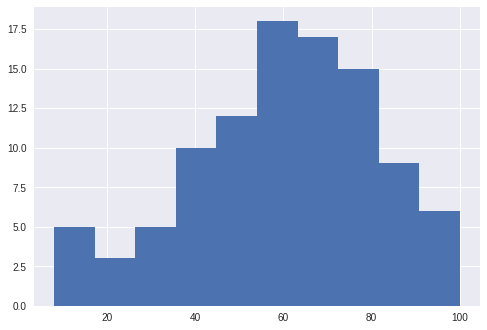

In [45]:
ex_data.lectures.hist(bins)
plt.show()

In [47]:
stats.describe(ex_data.numeracy)

DescribeResult(nobs=100, minmax=(1, 14), mean=4.8499999999999996, variance=7.3207070707070709, skewness=0.9468828141246891, kurtosis=0.8399068513473207)